# <span style='color:Blue'> 繪製拋物線  </span>
## <span style='background :yellow' > 拋物線方程式 $y=𝑎𝑥^2+𝑏𝑥+𝑐$  </span> 
## <span style='background :yellow' > 其中 a，b和c是實數 a≠0  </span>

the python version is 3.7.10
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24.
 25. 26. 27.]
[98.9, 100.8, 102.5, 104.0, 105.3, 106.4, 107.3, 108.0, 108.5, 108.8, 108.9, 108.8, 108.5, 108.0, 107.3, 106.4, 105.3, 104.0, 102.5, 100.8, 98.9]
when x is 17
 max y is 108900


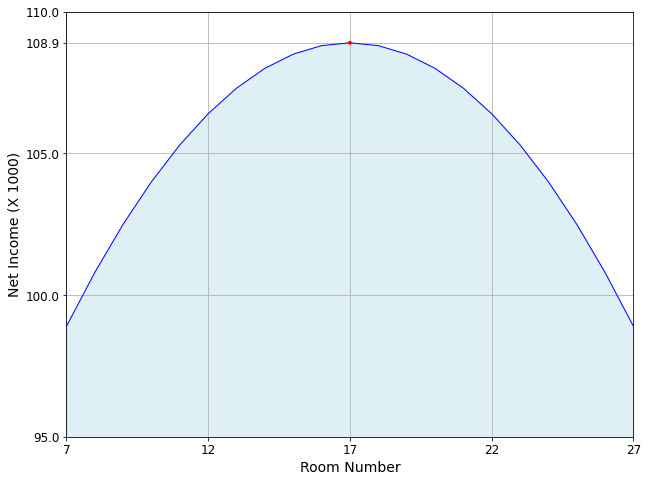

In [5]:
# 2-Answer-draw
# 繪製拋物線 draw parabola 
# date : 110-10-08
#
# 繪製的思路是從拋物線上採樣 1000 個點，這 1000 個點連成的函數圖像就平滑了許多。
# 拋物線方程式 f(x)= ax*x + bx + c
# 圖形的對稱軸為 x=-b/2a  ===>  a=-100, b=3400, x=-3400/-100*2 ===> x=17
# 若 a>0，在 x=-b/2a 時f(x)有最小值，
#        圖形最低點為 (-b/2a, (4*a*c-b*b)/4a)
#
# 若 a<0，在 x=-b/2a 時f(x)有最大值，
#        圖形最高點為 (-b/2a, (4*a*c-b*b)/4a)
#
# python 3.8.10
# run on replit.com
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is',python_version())
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin  = 3.0  # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 2.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 720
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(20, 15)  
fig = plt.figure(figsize=(tup7[0], tup7[1]), facecolor="white") # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(7, 27)      # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(95, 110)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [7,12,17,22,27]
yvalues = [95,100,105,108.9,110]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=12)
#
plt.xlabel("Room Number", fontsize=14)
plt.ylabel("Net Income (X 1000)", fontsize=14)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
plt.savefig("./png/para_curve_0.png",format="png",dpi=150)
#
def set_parabola_xy(a, b, c, x_start, x_end, num_points) :
    XS = np.linspace(x_start, x_end, num_points)
    YS = [(a*int_x*int_x + b*int_x + c)/1000 for int_x in XS]
    return XS, YS
# end def
#
def parabola_max_y(xs, ys) :
    #
    max_y = max(ys)
    max_index = ys.index(max_y)
    print('when x is', round(xs[max_index]))
    print(' max y is', round(max_y*1000))
    cir_x1 = shapely_Arc((xs[max_index], max_y), 0.07, 0, 360)
    motif_fill(cir_x1, 'red', 20, 1)
# end def
#
xs, ys = set_parabola_xy(-100,3400,80000, 7,27,21)
print(xs)
print(ys)
parabola_max_y(xs, ys)
#
ax.plot(xs, ys, color='blue', alpha=1.0, linewidth=1.0, solid_capstyle='round', zorder=10)
plt.savefig("./png/para_curve_1.png",format="png",dpi=150) #, facecolor="white")
#
plt.fill_between(xs, ys, plt.ylim()[0], color="lightblue", alpha=0.4)
plt.savefig("./png/para_curve_2.png",format="png",dpi=150) #, facecolor="white")